### Import python libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

### Assign variable to imported csv files 

In [2]:
hou_tmaxdf = pd.read_csv("tmax_houston.csv")

hou_rhumdf = pd.read_csv("rmin_houston.csv")

#print(hou_tmaxdf)

## Make array for yrs, max temps, relative humidity, days of year

In [3]:
#pull out yr vector for hou
#same num of yrs for both rhum and tmax

houyrs = np.array(hou_tmaxdf.Years)

#pull out the rest of the data for hou
houtmax = np.array(hou_tmaxdf.iloc[:,1:]) #all of x, all of y skip yrs

#rel hum
hourhum = np.array(hou_rhumdf.iloc[:,1:])

#day of year vector
houdoy = np.arange(1, 366+1) #day one until day 336


#create a storage variable for our annual mean Tmax values

houtmax_mean_allyrs = np.zeros((houyrs.size)) #storage variable of zeros the size of yrs

for i_houyrs in enumerate(houyrs):
    
    #location of all data
    loc_houyrs = i_houyrs[0] #do it for every yr starting at the 1st
    
    #pull out temp data for the current yr
    houtmax_houyrs = houtmax[loc_houyrs,:]
    
    
    #calc the mean
    houtmax_mean = np.nanmean(houtmax_houyrs)
    
    #store the current yr estimate in our full array
    houtmax_mean_allyrs[loc_houyrs] = houtmax_mean

# Overview of seasonality

## Plot Houston mean maximum temperature

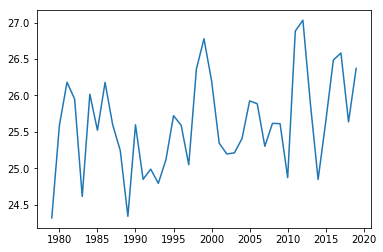

In [4]:
plt.plot(houyrs,houtmax_mean_allyrs) #draw trend lines

## Houston median tmax temps

(366,)


/Users/fiker/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median for 1 results
  r = func(a, **kwargs)


Text(0.5, 1.0, 'Houston Daily Median Maximum Temperature')

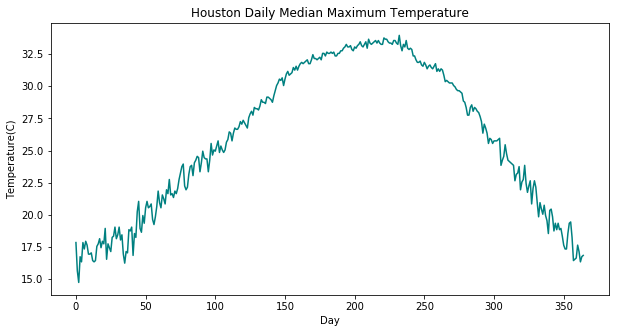

In [5]:
plt.figure(figsize=(10,5))

houtmax_median= np.median(houtmax,axis=0)

plt.plot(houtmax_median, color= 'teal', label= 'Maximum Temperature')
print((np.median(houtmax,axis=0)).shape)

plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Houston Daily Median Maximum Temperature')

## Houston rhum temps

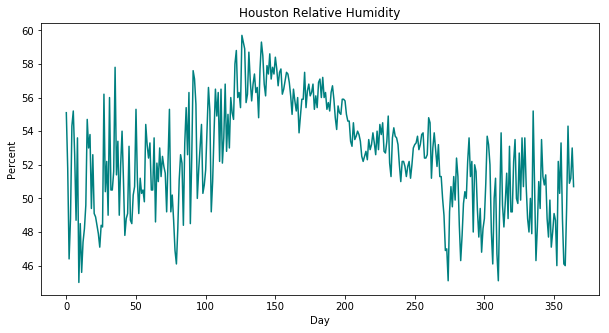

In [6]:
plt.figure(figsize=(10,5))

hourhum_median = np.median(hourhum,axis=0)

plt.plot(hourhum_median, color = 'teal', label= 'Relative Humidity')

plt.xlabel('Day')
plt.ylabel('Percent')
plt.title('Houston Relative Humidity')

plt.savefig('relhum_hou.JPEG',format='jpeg')

#more dangerous, susceptible to heat stress.

## Heat Index Calculations

In [7]:
# Input data
tdry = 35  # degrees Celsius
RH   = 20  # percent

# Calculate some parameters
Tr = (0.8841*tdry)+0.19
p  = (0.0196*tdry)+0.9031
es = 0.611*np.exp( 5423*( (1/273.15)  - (1/(tdry+273.15))   ) )

# Calculate heat index
Thi = Tr + (tdry-Tr)*(  (RH*es)/(100*1.6) )**p

# Print summary
print('Dry Bulb Temp: '+np.str(tdry)+' C')
print('Relative Humidity: '+np.str(RH)+' %')
print('THI feels like Temp: '+np.str(Thi)+' C')

Dry Bulb Temp: 35 C
Relative Humidity: 20 %
THI feels like Temp: 33.4694707635862 C


In [8]:
def heatindex(tmax,rmin):   #tmax and rhum
        # Calculate some parameters  
        Tr = (0.8841*tmax)+0.19
        p  = (0.0196*tmax)+0.9031   
        es = 0.611*np.exp( 5423*( (1/273.15)  - (1/(tmax+273.15))   ) )    
        #Calculate heat index    
        Thi = Tr + (tmax-Tr)*(  (rmin*es)/(100*1.6) )**p    
       
        return Thi
    #Calculate for one set of values
        THI_tmax = heatindex(30,30)
        print("Heat index is: ", THI_tmax)
        # Calculate for a while year
        THI_tmax = heatindex(year_tmax,year_rmin)
        print(THI_tmax)

## Houston THI

### Calculate heat indicies, median of heat indicies

In [9]:
THI_tmax_hou = heatindex(houtmax, hourhum)
#print(THI_tmax_hou)
THI_tmax_hou_median = np.median(heatindex(houtmax,hourhum), axis=0)

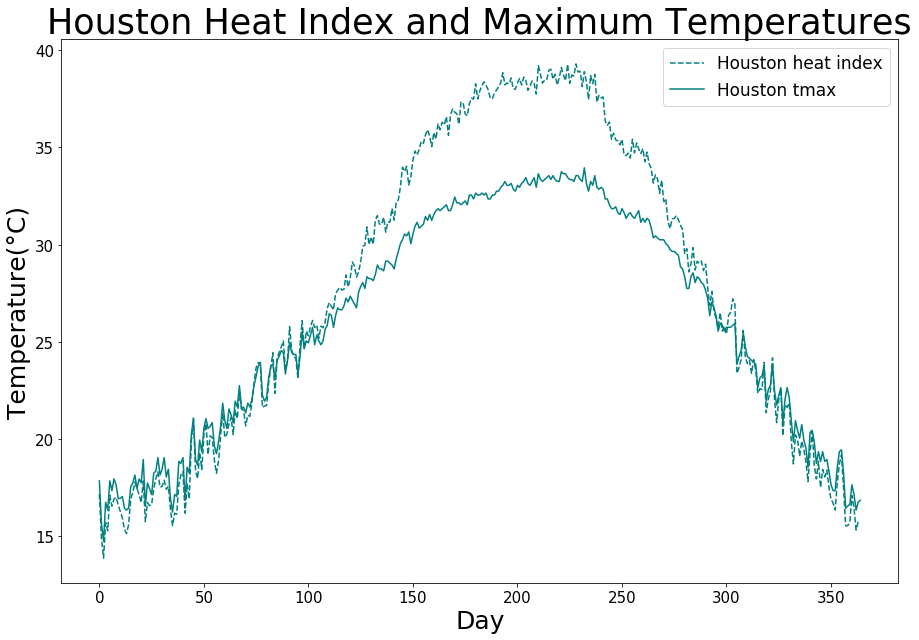

In [20]:
plt.figure(figsize=(15,10))

plt.plot(THI_tmax_hou_median,'--', color= 'teal', label= 'Houston heat index')
plt.plot(houtmax_median, color= 'teal', label= 'Houston tmax')

plt.rc('legend',fontsize=17) # using a size in points; SET DEFAULT USING RC
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

plt.legend()
plt.xlabel('Day', size=25)
plt.ylabel('Temperature(°C)', size=25)
plt.title('Houston Heat Index and Maximum Temperatures', size=35)
plt.savefig('thi_tmax_hou.JPEG',format='jpeg')

## Number of days where temperature was above 33°C

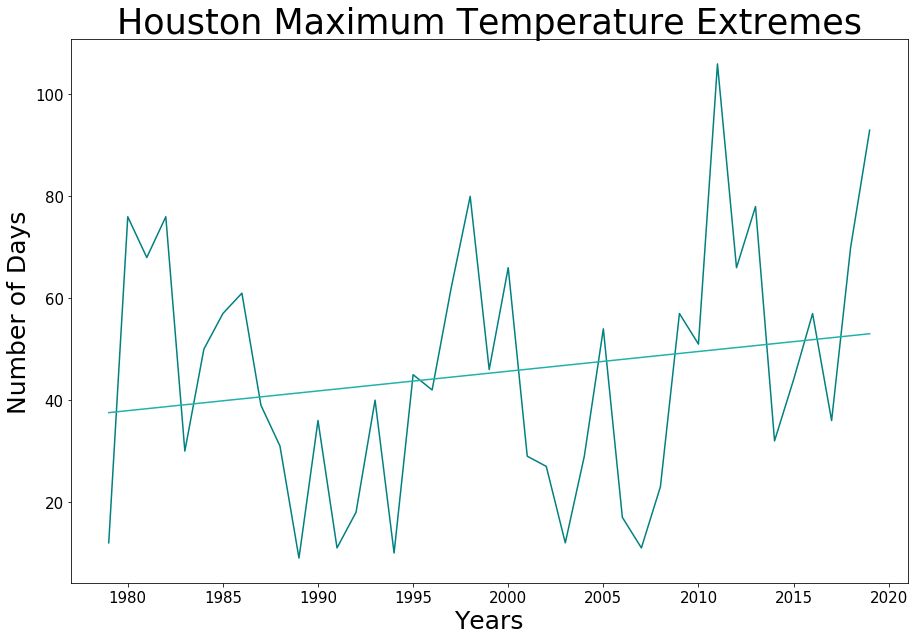

In [22]:
hou_heatdays = np.zeros((houyrs.size))

#91/32.7, 103/39.4, 126/52.2


for i_houyrs in enumerate(houyrs):
     
    # Pull out current year temperatures
    curr_year = houtmax[i_houyrs[0],:]
    
    hou_above_thresh = sum(i>=33 for i in curr_year)
    
    
    # Store value
    hou_heatdays[i_houyrs[0]] = hou_above_thresh 

# Calculate the regression
regstat_ehd = stats.linregress(houyrs,hou_heatdays)
reg_slope_ehd = regstat_ehd.slope      # slope of the regression line
reg_int_ehd   = regstat_ehd.intercept  # intercept of the regression line
reg_pval_ehd  = regstat_ehd.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_ehd = (houyrs*reg_slope_ehd)+reg_int_ehd
    
plt.figure(figsize=(15,10))
plt.plot(houyrs,hou_heatdays, color='teal')
plt.plot(houyrs, y_pred_ehd, color = 'lightseagreen')
plt.title('Houston Maximum Temperature Extremes', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Number of Days', size=25)
plt.savefig('abovethresh_hou.JPEG',format='jpeg')
#trend line

## Timing of first, last day above thresh and length of heat exposure season

## Calculate for tmax temperatures

/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater_equal
  # Remove the CWD from sys.path while we load stuff.


pval:  0.3755563644333234 slope:  0.37247386759581885


<Figure size 432x288 with 0 Axes>

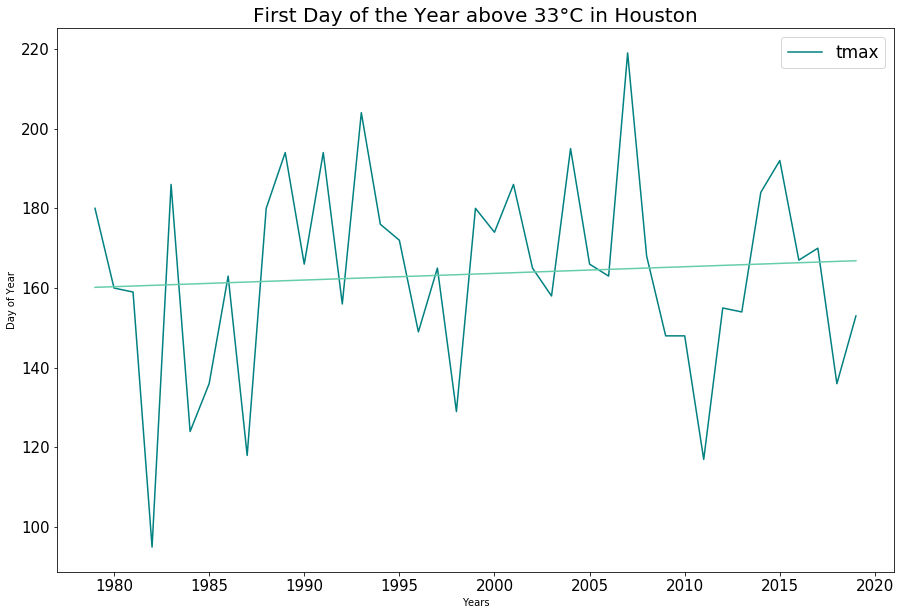

<Figure size 432x288 with 0 Axes>

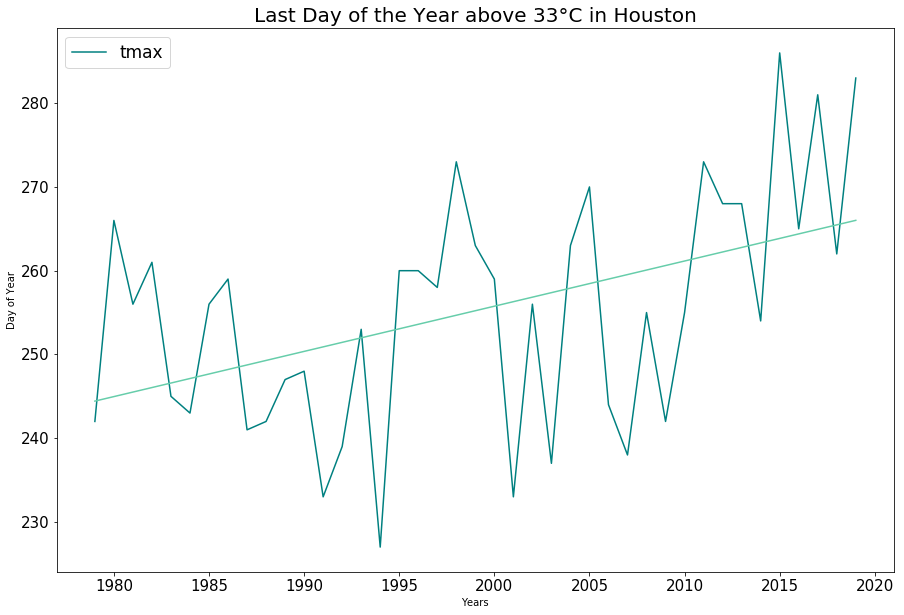

<Figure size 432x288 with 0 Axes>

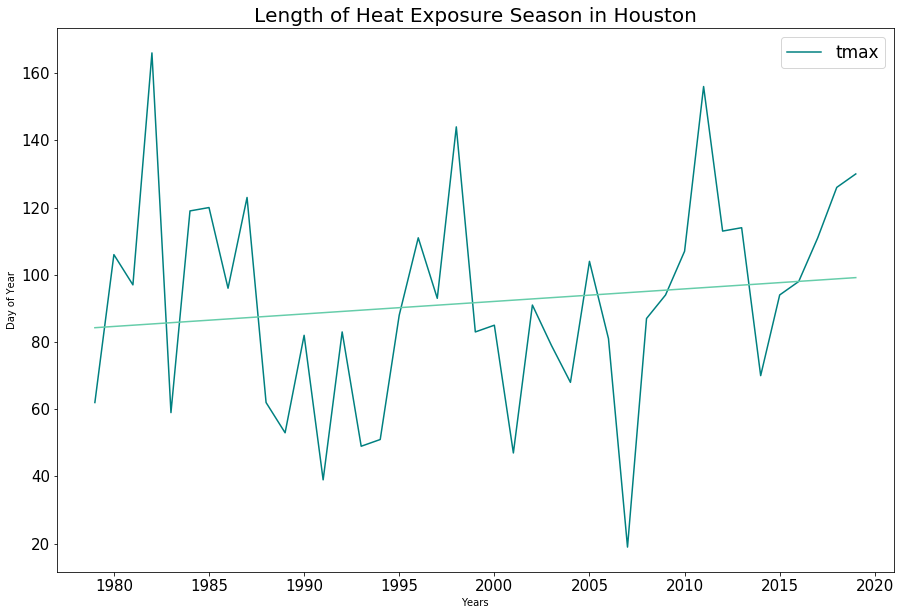

In [12]:
# Setup an array to store all the calculations
day1_t33_hou = np.zeros((houyrs.size))   # The first day of the year with Tmax>33
day2_t33_hou = np.zeros((houyrs.size))   # The last day of the year with Tmax>33
# Setup the Yearly Loop
for i_yr in enumerate(houyrs):
    #print(i_yr)
    #Take out the temperatures for current year
    curr_yr_hou = houtmax[i_yr[0],:].copy()
    # Find location of ALL days with TMAX>=33
    loc_days_hou = np.where(curr_yr_hou>=33)
    # Setup a boolean in case there are no days above 33 C
    if np.size(loc_days_hou)==0:
        t33_d1 = np.nan
        t33_d2 = np.nan
    else:
        t33_d1 = np.min(loc_days_hou)+1        
        t33_d2 = np.max(loc_days_hou)+1        
    # Put it in the storage array
    day1_t33_hou[i_yr[0]] = t33_d1.copy()
    day2_t33_hou[i_yr[0]] = t33_d2.copy()

regstat_day2_t33= stats.linregress(houyrs,day2_t33_hou)
reg_slope_d2 = regstat_day2_t33.slope      # slope of the regression line
reg_int_d2   = regstat_day2_t33.intercept  # intercept of the regression line
reg_pval_d2  = regstat_day2_t33.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day2 = (houyrs*reg_slope_d2)+reg_int_d2

# Calculate the regression
regstat_day1_t33= stats.linregress(houyrs,day1_t33_hou)
reg_slope_d1 = regstat_day1_t33.slope      # slope of the regression line
reg_int_d1   = regstat_day1_t33.intercept  # intercept of the regression line
reg_pval_d1  = regstat_day1_t33.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day1 = (houyrs*reg_slope_d1)+reg_int_d1

length_t33 = day2_t33_hou-day1_t33_hou
# Calculate the regression
regstat_len_t33= stats.linregress(houyrs,length_t33)
reg_slope = regstat_len_t33.slope      # slope of the regression line
reg_int   = regstat_len_t33.intercept  # intercept of the regression line
reg_pval  = regstat_len_t33.pvalue     # pvalue for significance
# Generate our model prediction
y_pred = (houyrs*reg_slope)+reg_int
#plt.figure()
#plt.plot(houyrs,length_t33)
#plt.plot(houyrs,y_pred,color='mediumaquamarine')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(houyrs,day1_t33_hou, color='teal', label = 'tmax')
plt.plot(houyrs, y_pred_day1, color = 'mediumaquamarine')
plt.title('First Day of the Year above 33°C in Houston', size=20)
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.legend()
plt.savefig('timing_first_hou.JPEG',format='jpeg')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(houyrs,day2_t33_hou, color='teal', label = 'tmax')
plt.plot(houyrs, y_pred_day2, color = 'mediumaquamarine')
plt.title('Last Day of the Year above 33°C in Houston', size=20)
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.legend()
plt.savefig('timing_last_hou.JPEG',format='jpeg')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(houyrs,day2_t33_hou-day1_t33_hou, color='teal', label = 'tmax')
plt.plot(houyrs,y_pred,color='mediumaquamarine')
plt.title('Length of Heat Exposure Season in Houston', size=20)
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.legend()
plt.savefig('timing_heatseason_hou.JPEG',format='jpeg')

print('pval: ',reg_pval, 'slope: ',reg_slope)

## Calculate for heat indicies

(Second day Hou) pval: 0.002601048815589294 y-intercept:  -823.3350174216027 slope: 0.5395470383275262
(First day Hou) pval: 0.6211429328816236 y-intercept:  -170.46707317073174 slope: 0.16707317073170733
(Length Hou) pval: 0.3755563644333234 y-intercept:  -652.8679442508711 slope: 0.37247386759581885


<Figure size 432x288 with 0 Axes>

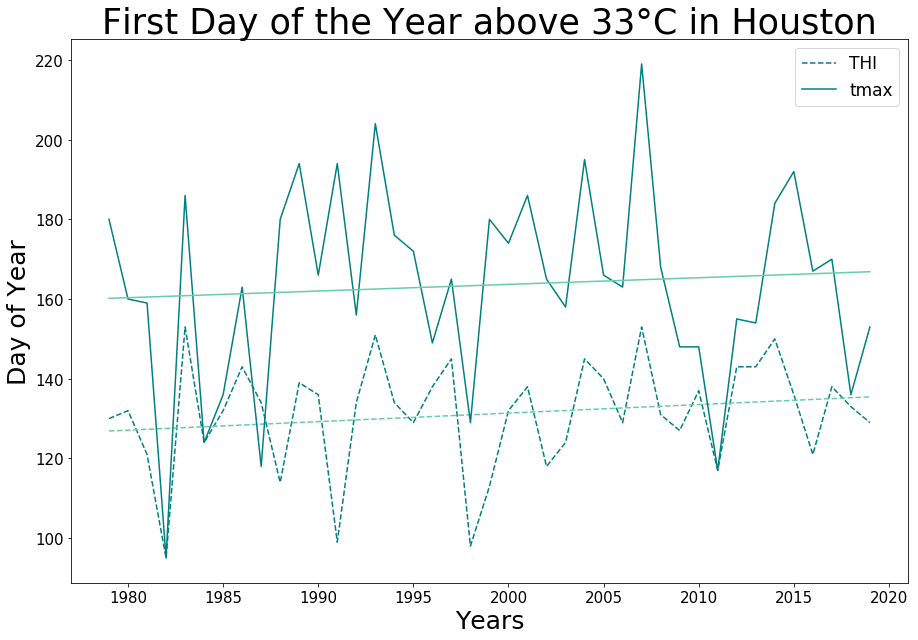

<Figure size 432x288 with 0 Axes>

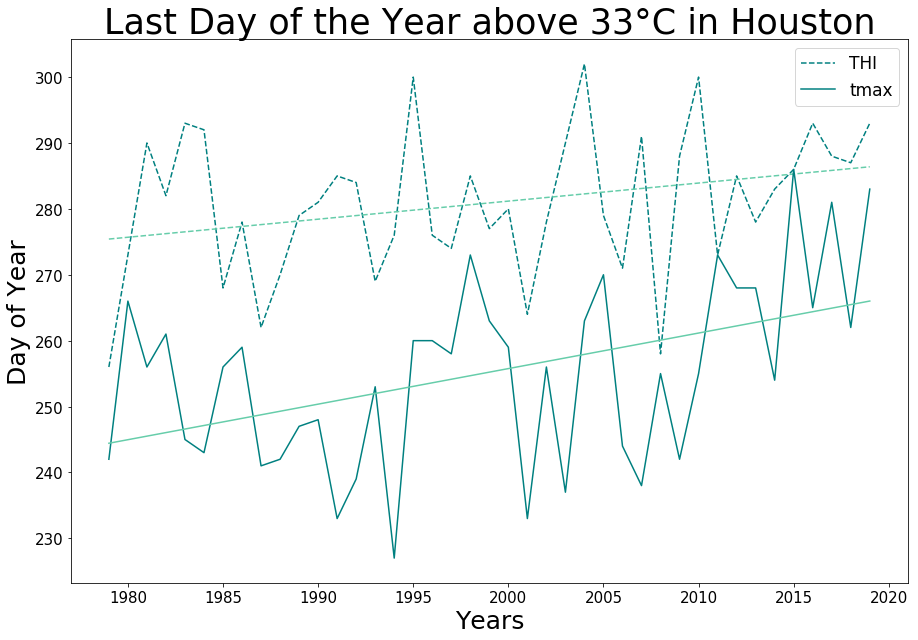

<Figure size 432x288 with 0 Axes>

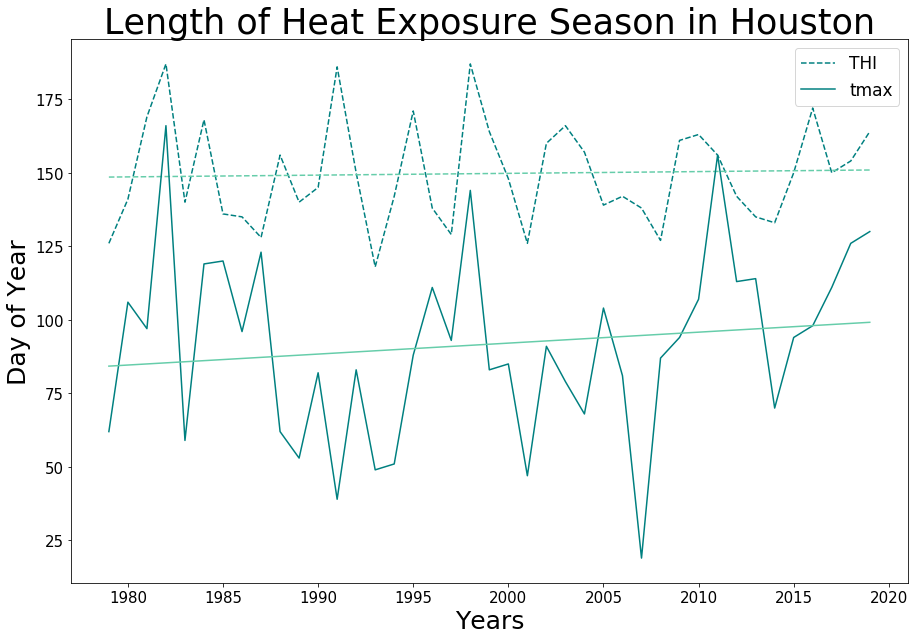

In [23]:
# Setup an array to store all the calculations
day1_t33_houTHI = np.zeros((houyrs.size))   # The first day of the year with Tmax>33
day2_t33_houTHI = np.zeros((houyrs.size))   # The last day of the year with Tmax>33
# Setup the Yearly Loop


for i_yr in enumerate(houyrs):
    #print(i_yr)
    #Take out the temperatures for current year
    curr_yr_hou = THI_tmax_hou[i_yr[0],:]
    # Find location of ALL days with TMAX>=33
    loc_days_hou = np.where(curr_yr_hou>=33)
    # Setup a boolean in case there are no days above 33 C
    if np.size(loc_days_hou)==0:
        t33_d1_hou = np.nan
        t33_d2_hou = np.nan
    else:
        t33_d1_hou = np.min(loc_days_hou)+1        
        t33_d2_hou = np.max(loc_days_hou)+1        
    # Put it in the storage array
    day1_t33_houTHI[i_yr[0]] = t33_d1_hou
    day2_t33_houTHI[i_yr[0]] = t33_d2_hou

heatexp_hou=day2_t33_houTHI-day1_t33_houTHI #heat exposure period

length_t33THI = day2_t33_houTHI-day1_t33_houTHI

regstat_day2_t33THI= stats.linregress(houyrs,day2_t33_houTHI)
reg_slope_d2THI = regstat_day2_t33THI.slope      # slope of the regression line
reg_int_d2THI   = regstat_day2_t33THI.intercept  # intercept of the regression line
reg_pval_d2THI  = regstat_day2_t33THI.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day2THI = (houyrs*reg_slope_d2THI)+reg_int_d2THI

# Calculate the regression
regstat_day1_t33THI= stats.linregress(houyrs,day1_t33_houTHI)
reg_slope_d1THI = regstat_day1_t33THI.slope      # slope of the regression line
reg_int_d1THI  = regstat_day1_t33THI.intercept  # intercept of the regression line
reg_pval_d1THI  = regstat_day1_t33THI.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day1THI = (houyrs*reg_slope_d1THI)+reg_int_d1THI

# Calculate the regression
regstat_len_t33THI = stats.linregress(houyrs,length_t33THI)
reg_slopeTHI = regstat_len_t33THI.slope      # slope of the regression line
reg_intTHI   = regstat_len_t33THI.intercept  # intercept of the regression line
reg_pvalTHI  = regstat_len_t33THI.pvalue     # pvalue for significance
# Generate our model prediction
y_predTHI = (houyrs*reg_slopeTHI)+reg_intTHI



plt.figure()
plt.figure(figsize=(15,10))
plt.plot(houyrs,day1_t33_houTHI,'--', color='teal', label = 'THI')
plt.plot(houyrs, y_pred_day1THI,'--', color='mediumaquamarine')
plt.plot(houyrs,day1_t33_hou, color='teal', label = 'tmax')
plt.plot(houyrs, y_pred_day1, color = 'mediumaquamarine')
plt.title('First Day of the Year above 33°C in Houston', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Day of Year', size=25)
plt.legend()
plt.savefig('timing_firstTHI_hou.JPEG',format='jpeg')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(houyrs,day2_t33_houTHI,'--', color='teal', label = 'THI')
plt.plot(houyrs, y_pred_day2THI,'--', color='mediumaquamarine')
plt.plot(houyrs,day2_t33_hou, color='teal', label = 'tmax')
plt.plot(houyrs, y_pred_day2, color = 'mediumaquamarine')
plt.title('Last Day of the Year above 33°C in Houston', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Day of Year', size=25)
plt.legend()
plt.savefig('timing_lastTHI_hou.JPEG',format='jpeg')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(houyrs,heatexp_hou,'--', color='teal', label = 'THI')
plt.plot(houyrs, y_predTHI,'--', color='mediumaquamarine')
plt.plot(houyrs,day2_t33_hou-day1_t33_hou, color='teal', label = 'tmax')
plt.plot(houyrs,y_pred,color='mediumaquamarine')
plt.title('Length of Heat Exposure Season in Houston', size=35) #Heat index as title
plt.xlabel('Years', size=25)
plt.ylabel('Day of Year', size=25)
plt.legend()
plt.savefig('timing_heatseasonTHI_hou.JPEG',format='jpeg')

#print('pval: ',reg_pvalTHI, 'slope: ',reg_slopeTHI)

print('(Second day Hou) pval:', reg_pval_d2,'y-intercept: ',reg_int_d2, 'slope:', reg_slope_d2)
print('(First day Hou) pval:', reg_pval_d1,'y-intercept: ',reg_int_d1, 'slope:', reg_slope_d1)
print('(Length Hou) pval:', reg_pval,'y-intercept: ',reg_int, 'slope:', reg_slope)


# Print all calculations!!

In [17]:

#d1 / 1st day
print('d1 THI 2050: ', 2050*reg_slope_d1+reg_int_d1)
print('d1 tmax 2050: ',2050*reg_slope_d1THI+reg_int_d1THI)

#d2 / last day
print('d2 THI 2050: ', 2050*reg_slope_d2+reg_int_d2)
print('d2 tmax 2050: ',2050*reg_slope_d2THI+reg_int_d2THI)

#heat exp season
print('len THI 2050: ', 2050*reg_slope+reg_int)
print('len tmax 2050: ',2050*reg_slopeTHI+reg_intTHI)

print('')
print('all stats len tmax', regstat_len_t33) #len tmax
print('all stats len THI', regstat_len_t33THI)
print('')
print('all stats d2 tmax', regstat_day1_t33) #d1 tmax
print('all stats d2 THI', regstat_day1_t33THI) #d1 THI
print()
print('all stats d1 tmax', regstat_day1_t33)#len tmax
print('all stats d1 THI', regstat_day1_t33THI)#len THI
print()
#print('EXP 2019: tmax: ', heatexp_hou[-1],'2019 THI: ', heatexp_houTHI[-1])
print('EXP 2019: THI: ', heatexp_hou[-1],'2019 tmax: ', length_t33[-1]) #variables switch
print()
print('   d1 2019: tmax: ', day1_t33_hou[-1],'2019 THI: ', day1_t33_houTHI[-1])
print()
print('   d2 2019: tmax: ', day2_t33_hou[-1],'2019 THI: ', day2_t33_houTHI[-1])
print()

#2050 mishap

#d1 / 1st day
print('d1 tmax 2050: ', 2050*reg_slope_d1+reg_int_d1)
print('d1 THI 2050: ',2050*reg_slope_d1THI+reg_int_d1THI)
print()
#d2 / last day
print('d2 tmax 2050: ', 2050*reg_slope_d2+reg_int_d2)
print('d2 THI 2050: ',2050*reg_slope_d2THI+reg_int_d2THI)
print()
#heat exp season
print('len tmax 2050: ', 2050*reg_slope+reg_int)
print('len THI 2050: ',2050*reg_slopeTHI+reg_intTHI)

d1 THI 2050:  172.03292682926826
d1 tmax 2050:  142.09041811846686
d2 THI 2050:  282.7364111498259
d2 tmax 2050:  294.88745644599294
len THI 2050:  110.70348432055755
len tmax 2050:  152.7970383275261

all stats len tmax LinregressResult(slope=0.37247386759581885, intercept=-652.8679442508711, rvalue=0.14207758480208857, pvalue=0.3755563644333234, stderr=0.41553704827386234)
all stats len THI LinregressResult(slope=0.06010452961672474, intercept=29.5827526132404, rvalue=0.04107248799450449, pvalue=0.798748863658209, stderr=0.23413010619763522)

all stats d2 tmax LinregressResult(slope=0.16707317073170733, intercept=-170.46707317073174, rvalue=0.07952277843098764, pvalue=0.6211429328816236, stderr=0.3353553924117431)
all stats d2 THI LinregressResult(slope=0.21411149825783982, intercept=-296.83815331010476, rvalue=0.18513025581880924, pvalue=0.2465364094535492, stderr=0.1819941486072192)

all stats d1 tmax LinregressResult(slope=0.16707317073170733, intercept=-170.46707317073174, rvalue

## Cooling degree days

/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less_equal
  import sys


(41,)
119116.90000000014
pval:  0.01856274437373076 slope:  6.0872926829268215 int -9263.207829268275
2050:  3215.74217073171
2019:  3170.660000000004


<Figure size 432x288 with 0 Axes>

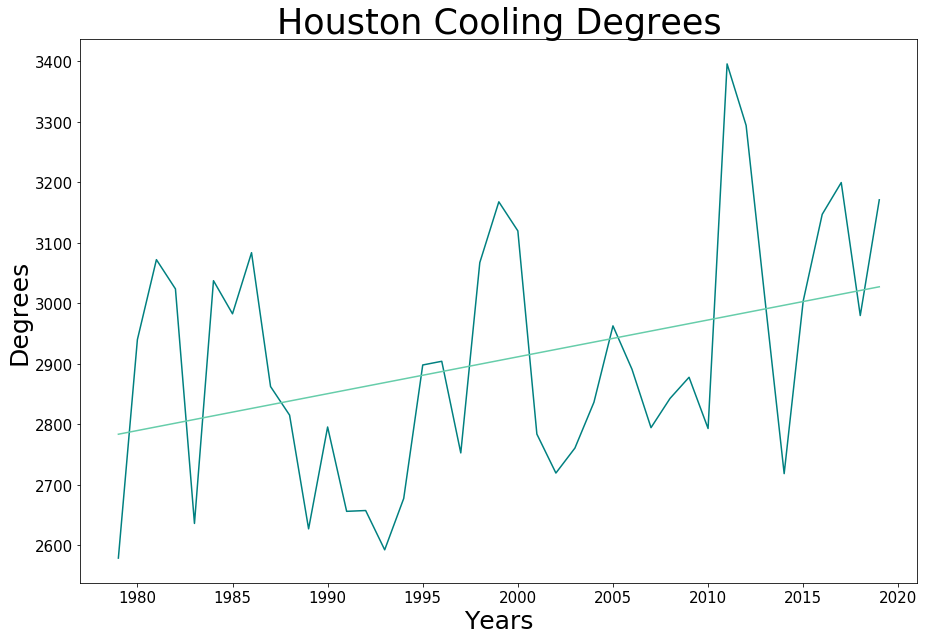

In [24]:
# Calculate the cooling degree days.
# Set the threshold for a CDD
thresh_cdd=18.33

# Convert individual days into CDD
year_cdd_hou = houtmax-thresh_cdd
i_noncdd_hou = np.where(year_cdd_hou<=0)
year_cdd_hou[i_noncdd_hou]=0

sumcdd_hou = np.nansum(year_cdd_hou, axis=1)

# Calculate the regression
regstat_CDD= stats.linregress(houyrs,sumcdd_hou)
reg_slopeCDD = regstat_CDD.slope      # slope of the regression line
reg_intCDD   = regstat_CDD.intercept  # intercept of the regression line
reg_pvalCDD  = regstat_CDD.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_cdd = (houyrs*reg_slopeCDD)+reg_intCDD

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Houston Cooling Degrees', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Degrees', size=25)
plt.plot(houyrs,sumcdd_hou, color='teal')
plt.plot(houyrs, y_pred_cdd, color='mediumaquamarine')
plt.savefig('CDD_hou.JPEG',format='jpeg')

print(sumcdd_hou.shape)
# Find the location of all the cooling degree days
# Use the locations
year_cumcdd = np.sum(year_cdd_hou[i_noncdd_hou])
print(np.sum(sumcdd_hou))

print('pval: ',reg_pvalCDD, 'slope: ',reg_slopeCDD, 'int', reg_intCDD)

#y=mx+b
print('2050: ',reg_slopeCDD*2050+(-9263.207829268275))
print('2019: ', sumcdd_hou[-1])

In [16]:
#trend lines, do calc for ehd for heat index, replicate for other cities
#NUMBER of days above 33 tmax, thi, per yr